In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [6]:
def Plot_Scatter(y_test, y_predict, model_name = 'Model'):
    fig = plt.figure()
    fig.suptitle(model_name)
    plt.xlabel('y_test')
    plt.ylabel('y_predict')
    plt.scatter(y_test,y_predict)
    plt.show()

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')
df = pd.read_csv("house_train.csv")
test = pd.read_csv("house_test.csv")

In [8]:
numeric = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
           'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
df = df[numeric]

In [9]:
X = df.drop(['SalePrice', 'YearBuilt','OverallQual','MasVnrArea','YrSold', 'TotRmsAbvGrd','MoSold',  'GarageArea', 'WoodDeckSF',  'BsmtFinSF1', 'BsmtFinSF2',
             'MSSubClass','PoolArea'],axis=1).values
y = df['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train= pd.DataFrame(X_train)
X_train.fillna(X_train.mean(), inplace=True)
X_test= pd.DataFrame(X_test)
X_test.fillna(X_test.mean(), inplace=True)

In [10]:
regtr = ExtraTreesRegressor(n_estimators=1000, random_state=0).fit(X_train, y_train)
regtr.score(X_test, y_test)

0.8637291611994842

In [11]:
y_pred3 = regtr.predict(X_test)

r2: 0.86
MAE:  18146.566630136982
RMSE:  30625.016138259092


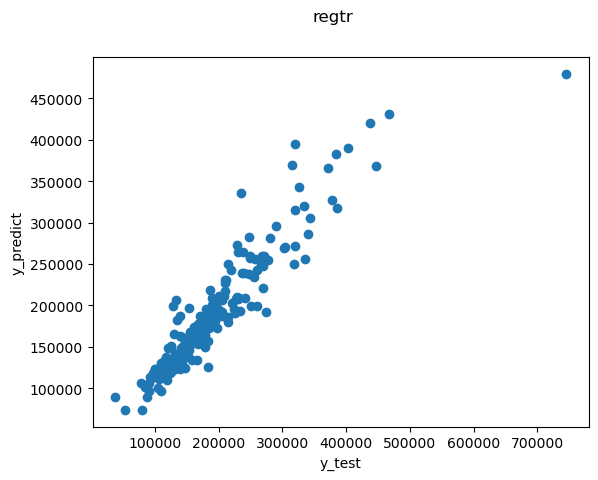

In [12]:
print("r2:", round(r2_score(y_test, y_pred3), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred3))
print("RMSE: ", mean_squared_error(y_test, y_pred3, squared=False))
Plot_Scatter(y_test, y_pred3, "regtr")

# Валидация (Эрдэни)

In [20]:
test = pd.read_csv('house_test.csv',index_col=0)
X_2 = test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
           'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']].drop(['YearBuilt','OverallQual','MasVnrArea','YrSold', 'TotRmsAbvGrd','MoSold',  'GarageArea', 'WoodDeckSF',  'BsmtFinSF1', 'BsmtFinSF2',
             'MSSubClass','PoolArea'],axis=1).fillna(0)

In [21]:
y_pred2 = regtr.predict(X_2)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


In [22]:
df_true = pd.read_csv("house_y_true.csv")
y_true = df_true['SalePrice'].values
len(y_true)

365

In [23]:
print("RMSE: ", mean_squared_error(y_true, y_pred2, squared=False))

RMSE:  30696.89707239188
